In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Siapkan data yang akan diolah

In [3]:
os.getcwd()

'/home/madao/Dokumen/My Road To AI/Regression/Linear Regression'

In [4]:
!ls

 data
'Linear Regresion.ipynb'
 Linear-Regression-explained.ipynb
'Linear Regression for multiple feature.ipynb'
'Linear Regression - GradientDescent method vs turningpoint method vs sklearn.ipynb'
'Linear Resgression.ipynb'
 review_LR.ipynb
 testiss.py
'Test syntax.ipynb'


In [5]:
path = os.getcwd()+ '/data/ex1data1.txt'
data = pd.read_csv(path, header=None, names =(['Populasi','Profit']))

# Lihat prilaku data

In [6]:
data.head()

,Populasi,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [7]:
data.describe()

,Populasi,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [8]:
data.Profit.mean()

5.83913505154639

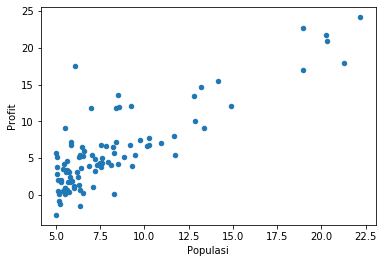

In [9]:
data.plot(kind='scatter', x = 'Populasi', y = 'Profit')

data Profit berkorelasi positif terhadap populasi .

# Metode Gradient Descent untuk regresi linear

### 1. membuat fungsi untuk menghitung cost function dengan inputan matrix X,y dan theta

In [10]:
def hitungcost(X,y,theta) :
    sqerror = np.power((X*theta.T-y),2)
    return np.sum(sqerror)/(2*len(X))

Note : sqerror = kuadrat error perdata, dengan X*theta.T adalah model yang dipilih dan y adalah data
        
        return cost function !

### 2. split data menjadi training set dan target variable

In [11]:
data.insert(0,'ones',1)

In [12]:
data.head()

,ones,Populasi,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [13]:
X = data.iloc[:,0:2]

In [14]:
X.head()

,ones,Populasi
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [15]:
y = data.iloc[:,2:3]

    Notes : jika slice kolom dengan number kolom ( data.iloc[:,2] ) y berupa pandas series
        
        jika slice kolom dengan range kolom ( data.iloc[:,2:3] ) y berupa pandas Dataframe

In [16]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


>X adalah matrix feature ( input ), variable ones untuk theta0 yang x0 nya bernilai 1


> y adalah target variable ( output ).


> model X*theta.T hendak memprediksi besar y

 ### menghitung cost fuction dan gradient descent kita menggunakan matrix, sehingga data frame harus dirubah menjadi numpy matrix

In [20]:
X= np.matrix(X.values)
y= np.matrix(y.values)

In [21]:
theta = np.matrix([0,0]) # nilai theta untuk inisiasi

In [22]:
type(theta), theta

(numpy.matrix, matrix([[0, 0]]))

In [23]:
X.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

In [20]:
hitungcost(X,y,theta)

32.072733877455676

In [21]:
theta2 = np.matrix([1,1])

In [22]:
hitungcost(X,y,theta2)

10.266520491383504

> Diatas dicoba menghitung cost fuction dengan theta 0,0 dan theta 1,1
> nilai cost function turun, kemungkinan cost function konvergen dari arah theta 0,0 ke 1,1

### 3. menghitung gradient descent

buat fungsi untuk menghitung gradient descent

In [17]:
def gradientDescent(X,y,theta, alpha, iters ):
    temp = np.matrix(np.zeros(theta.shape)) # variable untuk menyimpan theta sementara
    parameters = int(theta.shape[1]) # jumlah parameter
    cost = np.zeros(iters) # membuat array 0 sebanyak iterasi elemen untuk menyimpan besar cost tiap iterasi
    
    for i in range(iters):
        error = (X*theta.T) - y
        
        for j in range(parameters) :
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha/len(X))*np.sum(term))
        theta = temp
        cost[i] = hitungcost(X,y,theta)
        
    return theta, cost

> return / output dari fungsi diatas berupa theta dan bersar cost function dari theta yang dipilih

In [18]:
alpha = 0.01
iters = 1000

In [24]:
g, cost = gradientDescent(X,y,theta,alpha, iters)

In [25]:
g

matrix([[-3.24140214,  1.1272942 ]])

> Garis Linear yang didapat dari model diatas adalah $y = 1.13x - 3.24$

In [27]:
hitungcost(X,y,g)

4.515955503078912

> Cost function dari model diatas 4.5....

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

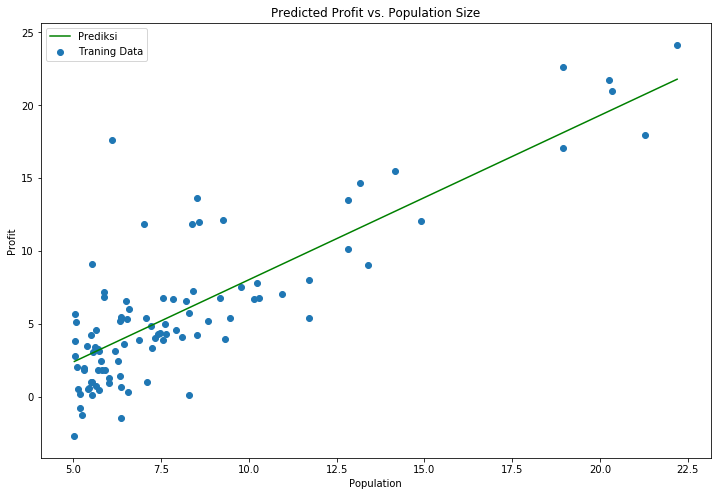

In [26]:
x = np.linspace(data.Populasi.min(), data.Populasi.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'g', label='Prediksi')
ax.scatter(data.Populasi, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

### Test cobacoba

> gunakan alpha dan iterasi yang berbeda

In [30]:
alpha2 = 0.001
iters2 = 10000

In [31]:
g2, cost2 = gradientDescent(X,y,theta,alpha2,iters2)

In [32]:
g2

matrix([[-3.24044334,  1.12719788]])

In [32]:
alpha3 = 0.0000001
iters3 = 10000

In [33]:
g3, cost3 = gradientDescent(X,y,theta,alpha3,iters3)

In [34]:
g3

matrix([[-3.78841926,  1.18224801]])

In [35]:
hitungcost(X,y,g2), hitungcost(X,y,g3)

(4.516069827120197, 4.478020743321126)

> besar cost function masih mengalami penurunan seiring ditambahnya jumlah iterasi, namun penurunannya tidak signifikan

# Metode Titik Balik untuk Regresi Linear
> motode ini menggunakan turunan pertama dari cost function = 0 untuk mencari titik stasioner dimana nilai cost fuction minimum

In [35]:
data.head()

,ones,Populasi,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [36]:
x = data.iloc[:,1:2]

In [37]:
x.head()

,Populasi
0,6.1101
1,5.5277
2,8.5186
3,7.0032
4,5.8598


In [38]:
t = data.iloc[:,2:3]

In [39]:
t.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [40]:
t = np.matrix(t.values)

In [41]:
x = np.matrix(x.values)

In [42]:
xtbar = x.T*t/len(x)

In [43]:
xtbar

matrix([[65.32884975]])

In [44]:
xbar = x.mean()

In [45]:
xbar

8.159799999999999

In [46]:
tbar = t.mean()

In [47]:
tbar

5.839135051546393

In [48]:
xkdrtbar = x.T*x/len(x)

In [49]:
xkdrtbar

matrix([[81.40394282]])

In [50]:
w1 = (xtbar-xbar*tbar)/(xkdrtbar-xbar*xbar)

In [51]:
w1

matrix([[1.19303364]])

In [52]:
w0 = tbar - w1*xbar

In [53]:
w0

matrix([[-3.89578088]])

In [54]:
w = np.matrix([-3.89578088,1.19303364])

In [55]:
w,g

(matrix([[-3.89578088,  1.19303364]]), matrix([[-3.24140214,  1.1272942 ]]))

# Menggunakan sklearn

In [56]:
from sklearn.datasets import make_regression
from sklearn import linear_model

In [57]:
linear_regression = linear_model.LinearRegression(normalize=True)

In [58]:
linear_regression.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [59]:
linear_regression.intercept_

array([-3.89578088])

In [60]:
linear_regression.coef_

array([[0.        , 1.19303364]])

In [61]:
sk = np.matrix([-3.89578088,1.19303364])

In [62]:
g,w,sk

(matrix([[-3.24140214,  1.1272942 ]]),
 matrix([[-3.89578088,  1.19303364]]),
 matrix([[-3.89578088,  1.19303364]]))

In [63]:
hitungcost(X,y,g)

4.515955503078912

In [64]:
dijelaskanhitungcost(X,y,w)

4.476971375975179

In [69]:
def gradient(x):
    return (1.1272942*x-3.24140214)
def turning(x):
    return(1.19303364*x-3.89578088)

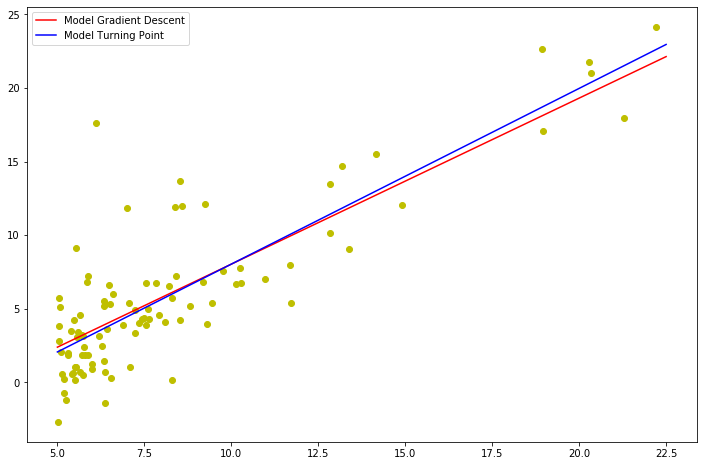

In [75]:
plot = plt.subplots(figsize=(12,8))
plt.scatter(data.Populasi, data.Profit,c='y')
x = np.linspace(5,22.5,100)
g = gradient(x)
h = turning(x)
plt.plot(x,g,c='r',label = 'Model Gradient Descent')
plt.plot(x,h,c='b',label = 'Model Turning Point')
plt.legend()

# hubungan cost function dengan jumlah iterasi

In [92]:
alpha = 0.01
iters = 1000

In [93]:
g,cost = gradientDescent(X,y,theta,alpha,iters)

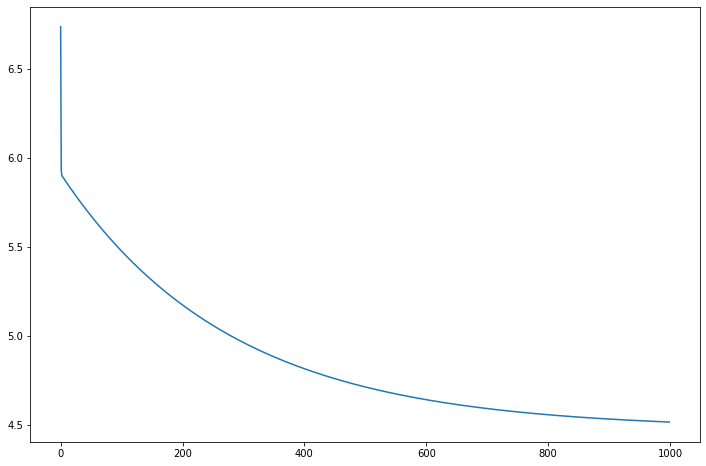

In [129]:
fig=plt.subplots(figsize=(12,8))
plt.plot(np.arange(1000),cost)

In [101]:
alpha = 0.01
iters2 = 10000
g2,cost2 = gradientDescent(X,y,theta,alpha,iters2)
g2,w

(matrix([[-3.89578082,  1.19303364]]), matrix([[-3.89578088,  1.19303364]]))

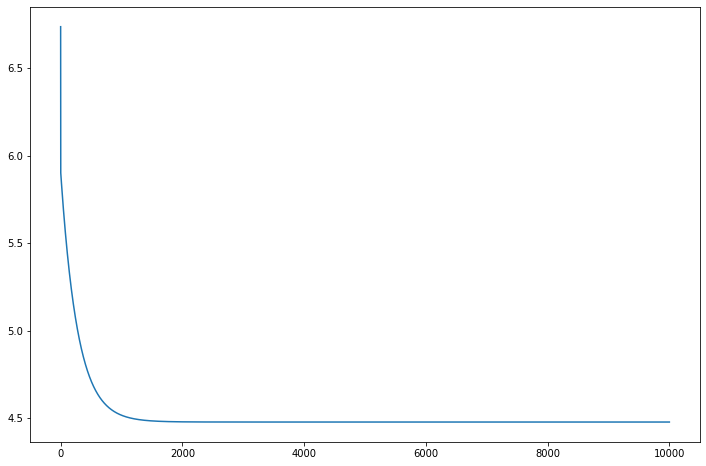

In [99]:
plt.subplots(figsize=(12,8))
plt.plot(np.arange(10000),cost2)

> cost function konvergen ke arah 4.5... dan mulai stabil dari iterai ke 1800an

## Seberapa bagus $R^2$ dari model yang didapat ?
> model yang dievaluasi adalah model dari gradient descent pertama

Variasi variabel target

In [38]:
y[0:5]

matrix([[17.592 ],
        [ 9.1302],
        [13.662 ],
        [11.854 ],
        [ 6.8233]])

In [46]:
y = np.array(y)

In [47]:
type(y)

numpy.ndarray

In [54]:
y.mean()

5.839135051546393

In [66]:
var_y = np.sum((((y - y.mean())**2)/len(y)))

In [67]:
var_y

30.049969604713663

variasi hasil fitting

In [77]:
var_fit = np.sum(((np.array(y - X*g.T))**2)/len(y))

In [78]:
R_squared = (var_y - var_fit)/var_y

In [80]:
R_squared*100

69.94369337151984

> 69.94% data profit dapat dijelaskan oleh model yang dibuat